# Division del DataSet

En este Notebook se muestran algunos alguno de los mecanismos mas utilizados para la division del DataSet.

## DataSet

### Descripcion

NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de datos
* <span style="color:green"> **KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format </span>
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format </span>
* KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file 
* KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file 
* KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format 
* KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21 
* KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21 

## 1.- Lectura del DataSet

In [4]:
import arff
import pandas as pd


In [5]:
def load_kdd_dataset(data_path):
    """Lectura del DataSet NSL-KDD."""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
    attributes = [attr[0] for attr in dataset["attributes"]]
    return pd.DataFrame(dataset["data"], columns = attributes)

In [6]:
df = load_kdd_dataset("../datasets/NSL-KDD/KDDTrain+.arff")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## 2.- Division del DataSet

Se debe separar el DataSet en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validacion y pruebas. sklearn tiene implementada la funcion **split_train_test**.

In [9]:
# Separar el DataSet de datos, 60% train_set, 40% test_set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.4, random_state = 42)

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell         

In [12]:
# Separar el DataSet de pruebas 50% para validation_set y 50% para test_set
val_set, test_set = train_test_split(test_set, test_size= 0.5, random_state = 42)

In [13]:
print("Longitud del Training_set: ", len(train_set))
print("Longitud de Validation_set: ",len(val_set))
print("Longitud de Test_set: ", len(test_set))

Longitud del Training_set:  75583
Longitud de Validation_set:  25195
Longitud de Test_set:  25195


## 3.- Particionado aleatorio y Stratified Sampling

Sklearn implementa la funcion **train_test_split**, sin embargo, esta funcion por defecto realiza un particionado del DataSet aleatorio para cada vez que se ejecuta el script. Aun añadiendo una semilla fija para la generacion aleatoria cada vez que se cargue de nuevo el DataSet se generaran nuevos subconjuntos, esto puede ocasionar que despues de muchos intentos, el algoritmo "vea o conozca" todo el DataSet.

Para solucionar este stopper, Sklearn ha implementado **Shuffle** en la funcion **train_test_split**.

In [15]:
# Si shuffle = false, el DataSet no mezclara antes el particionado.
train_set, test_set = train_test_split(df, test_size = 0.40, random_state = 42, shuffle = False)

Estos metodos de division del DataSet estan bien, si se tiene un DataSet muy grande, pero si no se tiene, se corre el riesgo de introducir **sampling bias**.

Para evitar esto, se utiliza un metodo de sampling que se llama **Stratified sampling**. El objetivo que no quede ninguna caracteristica del DataSet sin representacion en ninguno de los subconjuntos de datos para una o mas caracteristicas en particular.

Sklearn introduce el parametro **stratify** en la funcion **train_test_split** para controlar este comportamiento en particular.

This stratified parameter makes a split so that the proportional of values in the sample producer will be the same as the proportion of make sure that your random split has 25% of 0´s and 75% of 1's.

In [17]:
train_set, test_set = train_test_split(df, test_size = 0.40, random_state = 42, stratify = df["protocol_type"])

## 4.- Generacion de una funcion de particionado.

In [19]:
# Construccion de una funcion que realice el particionado completo
def train_val_test_split(df, rsate = 42, shuffle = True, stratify = None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size = 0.4, random_state = rsate, shuffle = shuffle, stratify = strat  
    )
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size = 0.5, random_state = rsate, shuffle = shuffle, stratify = strat
    )
    return (train_set, val_set, test_set)

In [20]:
print("Longitud del DataSet: ", len(df))
train_set, eval_set, test_set = train_val_test_split(df, stratify = 'protocol_type')
print("Longitud del Training_set: ", len(train_set))
print("Longitud de Validation_set: ",len(eval_set))
print("Longitud de Test_set: ", len(test_set))

Longitud del DataSet:  125973
Longitud del Training_set:  75583
Longitud de Validation_set:  25195
Longitud de Test_set:  25195


<Axes: >

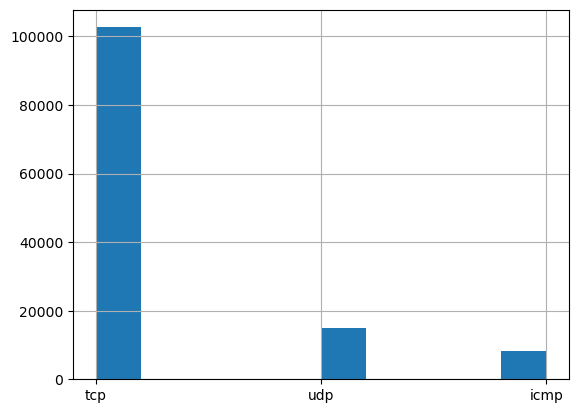

In [21]:
# Comprobar de que stratify mantiene la proporcion de las caracteristicas de los conjuntos
%matplotlib inline
import matplotlib.pyplot as plt

df["protocol_type"].hist()

<Axes: >

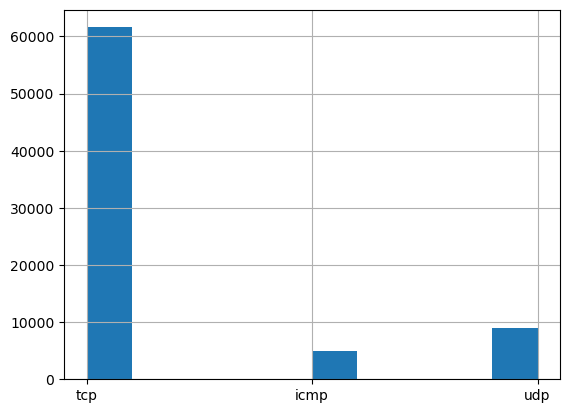

In [22]:
train_set["protocol_type"].hist()

<Axes: >

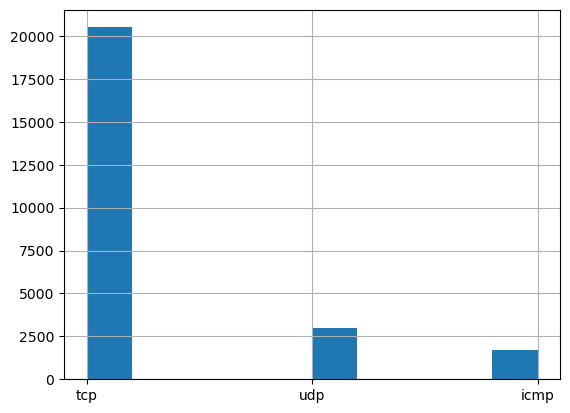

In [23]:
val_set["protocol_type"].hist()

<Axes: >

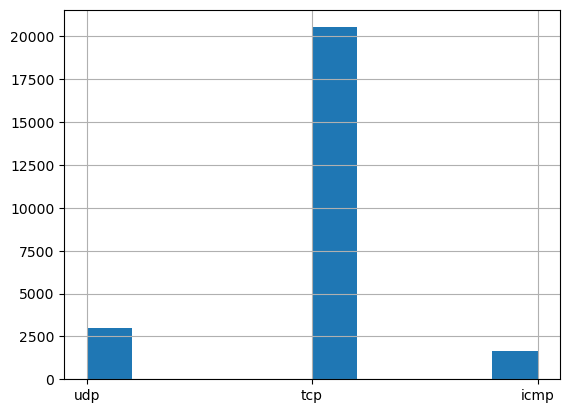

In [24]:
test_set["protocol_type"].hist()